# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [117]:
import pandas as pd


import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd

df = pd.read_csv('/Users/timothyernst/Documents/General Assembly/Iowa_Liquor_sales_sample_10pct.csv')


## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [134]:
df.head(50)

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53


In [119]:
#Data Cleaning
df.columns = [x.replace(" ", "") if ' ' in x else x \
for x in df.columns]

df.columns = [x.replace("(", "") if '(' in x else x \
for x in df.columns]

df.columns = [x.replace(")", "") if ')' in x else x \
for x in df.columns]

df.columns = [x.sentence.split() if ' ' in x else x \
for x in df.columns]

df['ZipCode'] = df['ZipCode'].replace('712-2', '51529')
df['ZipCode'] = df['ZipCode'].astype(int)

df['City'].str.upper()
df['CategoryName'].str.upper()
df['ZipCode'] = df['ZipCode'].replace('712-2', '51529')
df['ZipCode'] = df['ZipCode'].astype(int)

if df.dtypes.StateBottleCost != 'float64':
    df['StateBottleCost'] = [x.replace("$", "0") if '$' in x else x for x in df['StateBottleCost']]
    df['StateBottleCost'] = df['StateBottleCost'].astype(float)

if df.dtypes.StateBottleRetail != 'float64':
    df['StateBottleRetail'] = [x.replace("$", "0") if '$' in x else x for x in df['StateBottleRetail']]
    df['StateBottleRetail'] = df['StateBottleRetail'].astype(float)

if df.dtypes.SaleDollars != 'float64':
    df['SaleDollars'] = [x.replace("$", "0") if '$' in x else x for x in df['SaleDollars']]
    df['SaleDollars'] = df['SaleDollars'].astype(float)

df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)
#format="%m-%d-%y"


df[df['SaleDollars'] < (df.SaleDollars.std()*3)]
df[df['BottlesSold'] < (df.SaleDollars.std()*3)]
df[df['StateBottleRetail'] < (df.StateBottleRetail.std()*3)]
df[df['StateBottleCost'] < (df.StateBottleCost.std()*3)]

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53


## Record your findings

Be sure to write out anything observations from your exploratory analysis.

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                 270955 non-null datetime64[ns]
StoreNumber          270955 non-null int64
City                 270955 non-null object
ZipCode              270955 non-null int64
CountyNumber         269878 non-null float64
County               269878 non-null object
Category             270887 non-null float64
CategoryName         270323 non-null object
VendorNumber         270955 non-null int64
ItemNumber           270955 non-null int64
ItemDescription      270955 non-null object
BottleVolumeml       270955 non-null int64
StateBottleCost      270955 non-null float64
StateBottleRetail    270955 non-null float64
BottlesSold          270955 non-null int64
SaleDollars          270955 non-null float64
VolumeSoldLiters     270955 non-null float64
VolumeSoldGallons    270955 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(6), object(4)
memory usage: 37.2+ MB


In [121]:
df['BottleVolumeml'].unique()

array([ 750, 1000, 1750,  200,  300,  500,  375, 3000, 2400,  600,  100,
       1200,  800, 4800,  150, 2250, 1500,  400, 3600,   50,  850,  950,
        603, 2550, 6000, 1125, 4500,  900,  250])

In [122]:
df['City'].nunique()

385

NameError: name 'data' is not defined

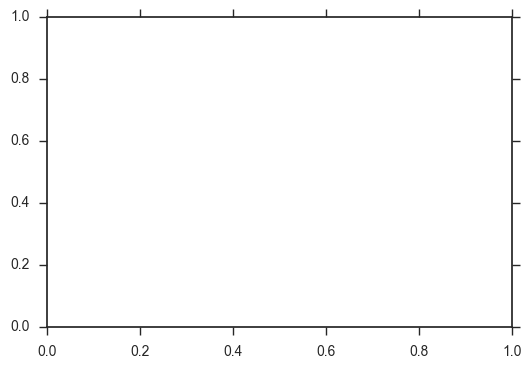

In [124]:
"""fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])"""

In [ ]:
"""data_df.ix[:, :] = (data_df.ix[:,:] - data_df.ix[:,:].mean())\
                   / data_df.ix[:,:].std()
df.hist(column='StateBottleCost')"""

In [ ]:
df['StateBottleCost'].max()

In [ ]:
df['SaleDollars'].max()

In [ ]:
df.isnull().sum()

In [ ]:
print(plt.style.available)


Taking a look at the distribution of Sales Dollars per order, we can see the majority of oders are small, and then follow a near perfect log-normal distribution trailing off as orders become more expensive. This is affected by the buying habits of individual stores. Namely, do they make frequent small purchases or few large purchases. We'll group it by individual stores below. 

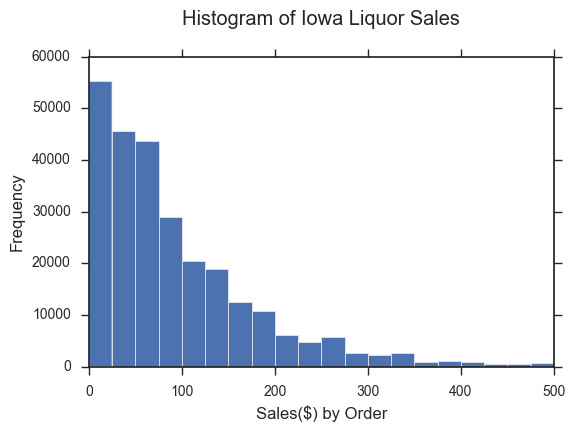

In [185]:
ax = plt.hist(df['SaleDollars'], range=(0, 500), bins=20)
plt.style.use('seaborn-deep')
plt.xlabel('Sales($) by Order')
plt.ylabel('Frequency')
plt.title(r'Histogram of Iowa Liquor Sales', y=1.08)
plt.show()

In [244]:
hist_df = df.groupby(['StoreNumber'])['VolumeSoldGallons', 'BottlesSold', 'StateBottleRetail', 'SaleDollars' ].agg([sum], margins=True)
hist_df.head()

,VolumeSoldGallons,BottlesSold,StateBottleRetail,SaleDollars
,sum,sum,sum,sum
StoreNumber,,,,
2106,3130.85,12587,10138.83,176849.97
2113,221.03,830,2993.26,11376.12
2130,2231.98,9156,7651.68,139727.54
2152,204.29,709,2198.51,9097.51
2178,644.09,2408,4257.50,29912.68


The histogram below shows the distribution by store of much sales the state makes to those individual stores. We can see a skewed right distribution. Most stores purchase between $2,500 and $7,500. However, we can see there is a fatter tail than some of the distributions. Any new store that opens should expect to fall somewhere around the mode of this distribution. 

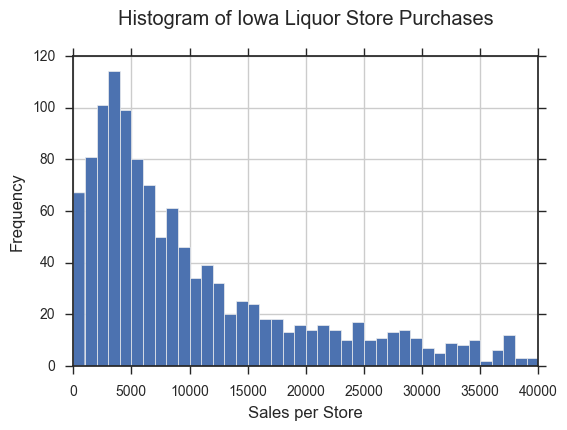

In [181]:
hist_df['SaleDollars'].hist(range=(0,40000), bins= 40)
plt.style.use('seaborn-deep')
plt.xlabel('Sales per Store')
plt.ylabel('Frequency')
plt.title(r'Histogram of Iowa Liquor Store Purchases', y=1.08)
plt.show()

Here we can take a look at the distribution of bottles in each order. The histograme below breaks the data into one bin for each bottle. We can see two major spikes in the data at 12 and 6. This is expected as a liquor is often sold as a case of 12 or a half case of 6. This histogram is affected by the size of each order so a store that makes two orders of 3 bottles versus one order of 6 bottles will affect the data. Below we've group the data by store to take a look at the distribution of how many bottles each store is odering. 

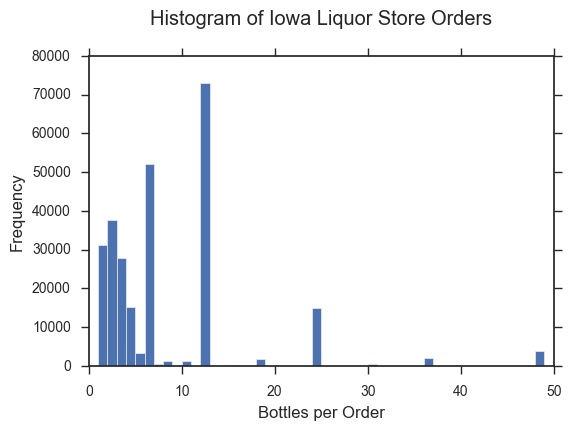

In [178]:
plt.hist(df['BottlesSold'], range=(0, 50), bins=50)
plt.style.use('seaborn-deep')
plt.xlabel('Bottles per Order')
plt.ylabel('Frequency')
plt.title(r'Histogram of Iowa Liquor Store Orders', y=1.08)
plt.show()

This histogram below shows how many bottles each store is odering. We can see that most stores order between about 250 and 750 bottles and then it begins to train off in a right skewed distribution. You should expect to sell somewhere around the mode of 312 the for any new stores that open. 

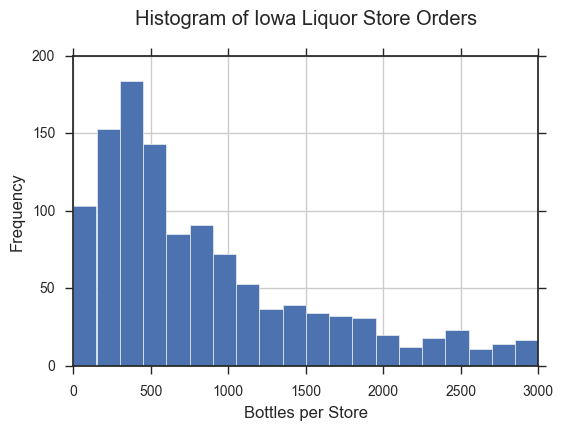

In [179]:
hist_df['BottlesSold'].hist(range=(0,3000), bins=20)
plt.style.use('seaborn-deep')
plt.xlabel('Bottles per Store')
plt.ylabel('Frequency')
plt.title(r'Histogram of Iowa Liquor Store Orders', y=1.08)
plt.show()

In [213]:
cost_bottle = df['StateBottleRetail'].mean()
print cost_bottle

14.6757599601


AttributeError: 'AxesSubplot' object has no attribute 'hist_df'

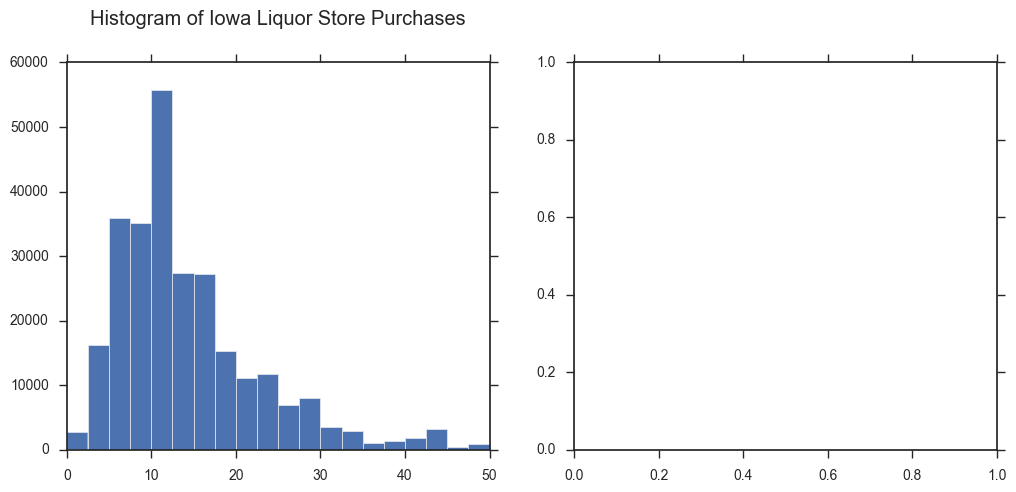

In [172]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].hist(df['StateBottleRetail'], range=(0, 50), bins=20 )
#axes[0].style.use('seaborn-deep')
#axes[0].xlabel('Bottles per Order')
#axes[0].ylabel('Frequency')
axes[0].set_title(r'Histogram of Iowa Liquor Store Purchases', y=1.08)


axes[1].hist_df['StateBottleRetail'].hist(range=(0, 6000), bins=30)
#axes[1].style.use('seaborn-deep')
#axes[1].xlabel('Bottles per Order')
a#xes[1].ylabel('Frequency')
axes[1].set_title(r'Histogram of Iowa Liquor Store Purchases', y=1.08)

for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')


plt.show()

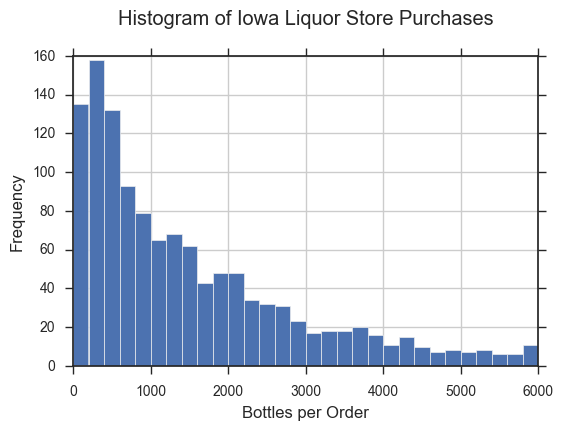

In [162]:
hist_df['StateBottleRetail'].hist(range=(0, 6000), bins=30)
plt.style.use('seaborn-deep')
plt.xlabel('Bottles per Order')
plt.ylabel('Frequency')
plt.title(r'Histogram of Iowa Liquor Store Purchases', y=1.08)
plt.show()

(array([  0.00000000e+00,   3.12530000e+04,   3.75940000e+04,
          2.79490000e+04,   1.51360000e+04,   3.21800000e+03,
          5.21960000e+04,   3.98000000e+02,   1.23300000e+03,
          1.69000000e+02,   1.38800000e+03,   2.10000000e+01,
          7.30100000e+04,   6.00000000e+00,   1.80000000e+01,
          1.17000000e+02,   1.30000000e+01,   2.00000000e+00,
          1.74200000e+03,   3.00000000e+00,   6.50000000e+01,
          4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.49260000e+04,   4.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          5.93000000e+02,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.13000000e+03,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   5.00000000e+00,   0.00000000e+00,
          1.07000000e+02,   0.00000000e+00,   6.70000000e+01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

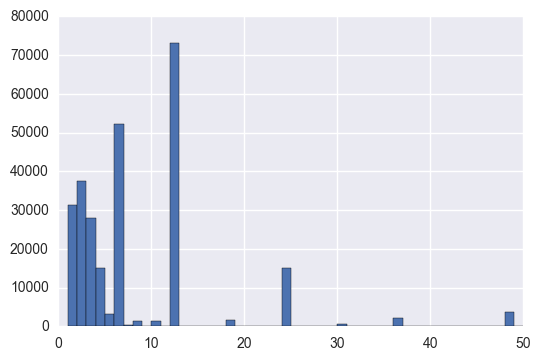

In [58]:
plt.hist(df['BottlesSold'],  range=(0, 50), bins=50)

In [281]:
vendor_bycounty_df = df.groupby('County')['VendorNumber'].nunique().to_frame('TotalVendors')
vendor_bycounty_df.to_csv('/Users/timothyernst/Documents/General Assembly/TotalVendors.csv')


In [277]:

tab_df = df.groupby(['County'])['VolumeSoldGallons', 'BottlesSold', 'StateBottleRetail', 'SaleDollars'].agg([sum], margins=True)
#tab_df.to_csv('/Users/timothyernst/Documents/General Assembly/IowaCountyAggFunc.csv')
tab_df.reset_index(inplace=True)

tab_df.head()

,County,VolumeSoldGallons,BottlesSold,StateBottleRetail,SaleDollars
,,sum,sum,sum,sum
0,Adair,1152.08,4653,8180.15,55581.34
1,Adams,258.93,955,3569.26,12441.71
2,Allamakee,2078.82,7452,15646.13,99024.76
3,Appanoose,2124.70,8176,14929.02,98527.16
4,Audubon,453.89,1694,2977.61,19655.54


In [276]:
vendor_bycounty_df.reset_index(inplace=True)
vendor_bycounty_df.head()

ValueError: cannot insert level_0, already exists

In [265]:
#tab_df.columns = ['County', 'VolumeSoldGallons', 'BottlesSold','StateBottleRetail', 'SaleDollars']

tab_df.merge(vendor_bycounty_df, how='left', left_on=('County'), right_on='County')
tab_df.head(50)

,County,VolumeSoldGallons,BottlesSold,StateBottleRetail,SaleDollars
,,sum,sum,sum,sum
0,Adair,1152.08,4653,8180.15,55581.34
1,Adams,258.93,955,3569.26,12441.71
2,Allamakee,2078.82,7452,15646.13,99024.76
3,Appanoose,2124.70,8176,14929.02,98527.16
4,Audubon,453.89,1694,2977.61,19655.54
5,Benton,1787.87,6450,13752.29,80063.61
6,Black Hawk,34937.61,173235,212074.22,1936791.79
7,Boone,4636.43,17259,29308.18,223354.58
8,Bremer,4232.32,15205,33261.40,205039.53


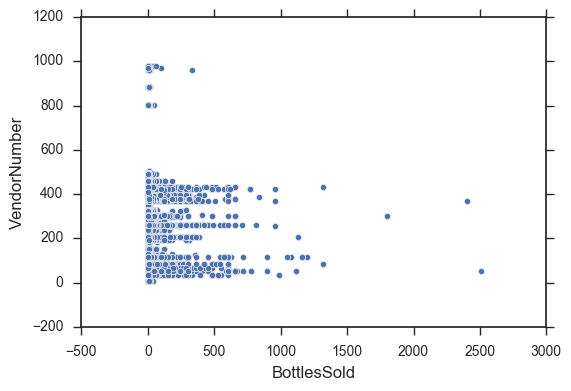

In [165]:
df.plot(kind='scatter', y='VendorNumber', x='BottlesSold')

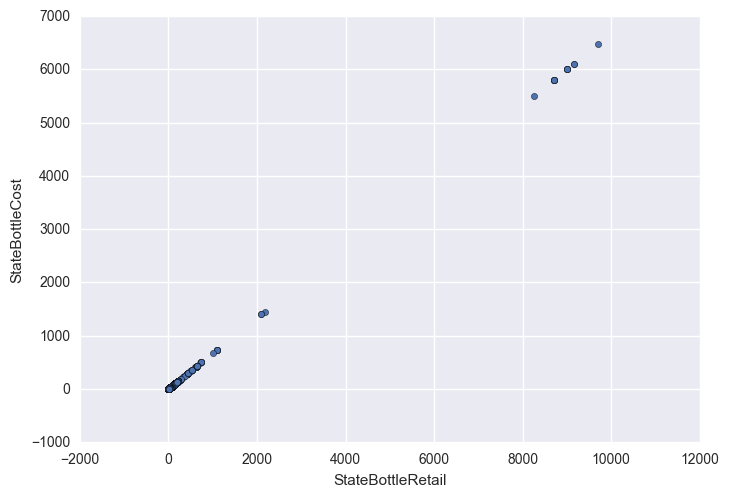

In [15]:
df.plot(kind='scatter', y='StateBottleCost', x='StateBottleRetail')

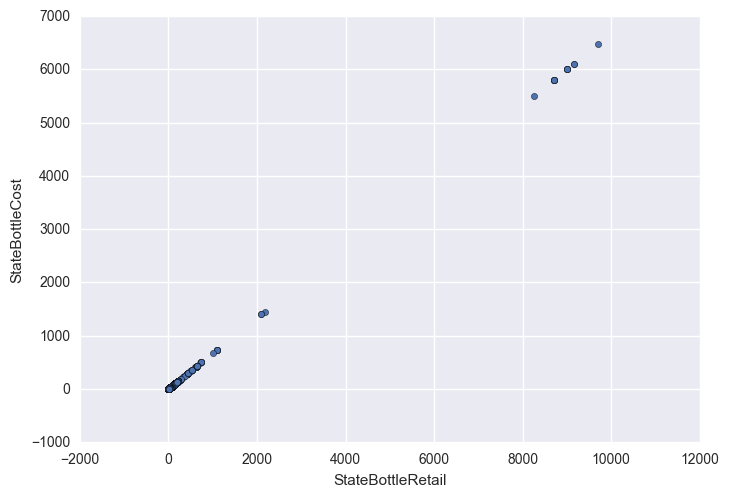

In [16]:
df.plot(kind='scatter', y='StateBottleCost', x='StateBottleRetail')

In [29]:
def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = stdang

In [ ]:
#Dummy zip.

"""zip_dummy = {}
counter = 0
for i in df['ZipCode'].unique():
    zip_dummy[i] = counter
    counter += 1
df['zip_dummy'] = df['ZipCode'].map(zip_dummy)

df.head(30)"""

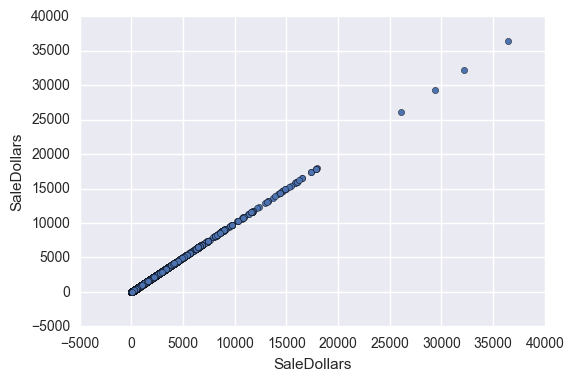

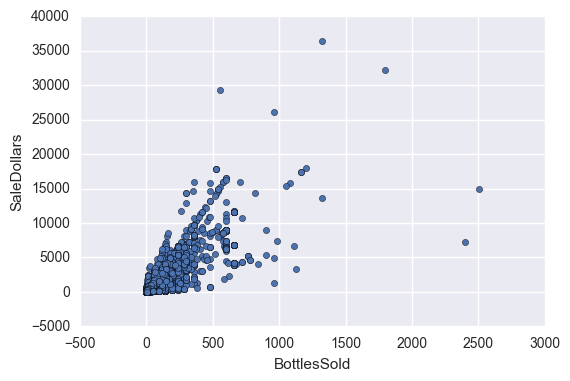

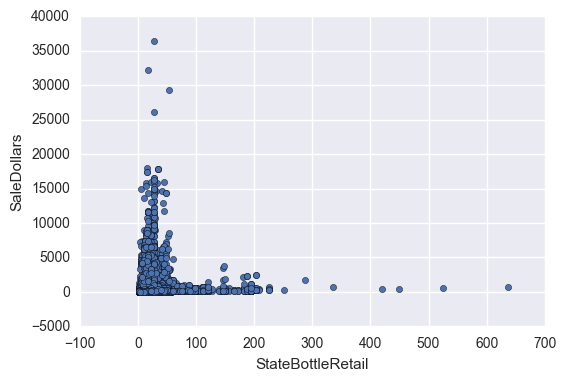

In [43]:
for column in ["SaleDollars", "BottlesSold", "StateBottleRetail"]:
    df.plot.scatter(x=column, y='SaleDollars')

In [33]:
df.head()

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [1]:
df.describe()

NameError: name 'df' is not defined

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [ ]:
from sklearn import linear_model


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.